# Data Science in Marketing: Customer Segmentation with Python - part 1

Salah satu teknik yang bisa dilakukan untuk mengenal pelanggan lebih baik adalah dengan melakukan segmentasi pelanggan. Yaitu dengan mengelompokkan pelanggan-pelanggan yang ada berdasarkan kesamaan karakter dari pelanggan tersebut. Untuk melakukan hal tersebut gunakan teknik unsupervised machine learning.

*Salah satu teknik yang dapat digunakan adalah mengaplikasikan machine learning menggunakan algorima K-Prototypes. Algorima K-Prototypes merupakan gabungan dari K-Means dan K-Modes yang dapat digunakan untuk melakukan segmentasi dengan data*.

Data yang digunakan saat ini memiliki kolom dengan rician sebagai berikut :  
- CustomerID : Kode Pelanggan dengan format campuran text *CUST-* diikuti anggka  
- Nama Pelanggan : Nama dari pelanggan dengan format text  
- Jenis Kelamin : Jenis Kelamin dari pelanggan. hanya terdapat dua isidata kategori yaitu Pria dan Wanita  
- Umur : Umur dari pelanggan dalam format angka
- Profesi : Profesi dari pelanggan, bertipe text kategoru yang terdiri dari : Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.  
- Tipe Residen : Tipe tempat tinggal dari pelanggan, terdiri dari 2 kategori yaitu Cluster dan Sector.  
- NilaiBelanjaSetahun : merupakan total belanja yang sudah dikeluarka oleh pelanggan tersebut.



## Persiapkan Library
- Pandas, di gunakan untuk melakukan pemrosesan analisis data  
- Matplotlib, di gunakan sebagai dasar untuk melakukan visualisasi data  
- Seaborn, di gunakan di atas matplotlib untuk melakukan data visualisasi yang lebih menarik  
- Scikit - Learn, digunakan untuk mempersiapkan data sebelum dilakukan permodelan  
- kmodes, digunakan untuk melakukan permodelan menggunakan algoritma K-Modes dan K-Prototypes.  
- Pickle, digunakan untuk melakukan penyimpanan dari model yang akan di buat  

In [2]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder
  
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
import pickle  
from pathlib import Path

In [3]:
# Baca Data Pelanggan
# import dataset  
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")  
  
# menampilkan data  
print(df.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


## Melihat informasi dari Data
Lihat informasi jumlah kolom, nama kolom, indentifikasi null values dan tipe data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


## Kesimpulan
Dalam setiap project *machine learning kita harus memahami informasi dasar dari data yang kita miliki sebelum melakukan analisa lebih lanjut, memastikan tipe data dari masing-masing kolom sudah benar, mengetahui apakah ada data null di tiap-tiap kolom, dan juga mengetahui nama-nama kolom di dataset yang digunakan. dari perintah diatas dapat diketahui bahwa :  
- Data yang akan digunakan terdir dari 50 baris dan 7 kolom.  
- Tidak ada nilai Null pada data
- Dua kolom memiliki tipe data numeric dan lima data bertipe string


## Melakukan Eksplorasi Data
Lakukan eksplorasi data untuk lebih mengenal dataset yang akan digunakan. Lakukan eksplorasi untuk data numerik dan juga data kategorikal.

### Eksplorasi Data Numerik
Pertama-tama perlu melihat distribusi data dari data yang berjenis numerik. Gunakan boxplot dan juga histogram untuk melihat distribusi datanya. Untuk melihat grafik tersebut, perlu disiapkan kolom mana yang merupakan numerik, kemudian menggunakan library seaborn untuk membuat plot masing-masing kolom numerik, yaitu *'Umur'* dan *'NilaiBelanjaSetahun'*.

Buat grafik boxplot dan histogram untuk kolom *Umur* dan juga *NilaiBelanjaSetahun*.

/home/dany/code/wsl/venv/dqlab/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/dany/code/wsl/venv/dqlab/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dany/code/wsl/venv/dqlab/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)


<Figure size 432x288 with 0 Axes>

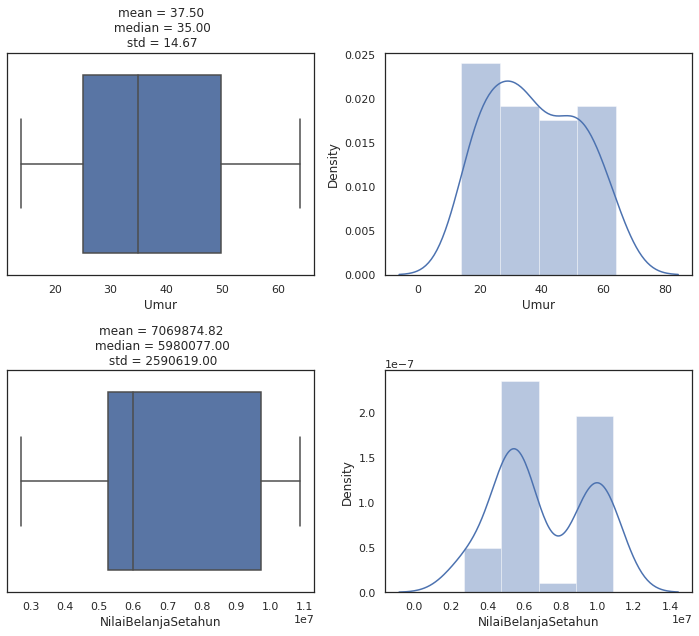

In [9]:
sns.set(style='white')
plt.clf()
  
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Umur','NilaiBelanjaSetahun'] 
observasi_num(kolom_numerik) 

### Eksplorasi Data Kategorikal
Selain data numerikal, perlu dilihat juga sebaran data pada kolom-kolom yang memiliki jenis kategorikal yaitu Jenis Kelamin, Profesi dan Tipe Residen, hal ini dapat dilakukan dengan menggunakan method countplot dari library seaborn.

/home/dany/code/wsl/venv/dqlab/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/dany/code/wsl/venv/dqlab/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/dany/code/wsl/venv/dqlab/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)


<Figure size 432x288 with 0 Axes>

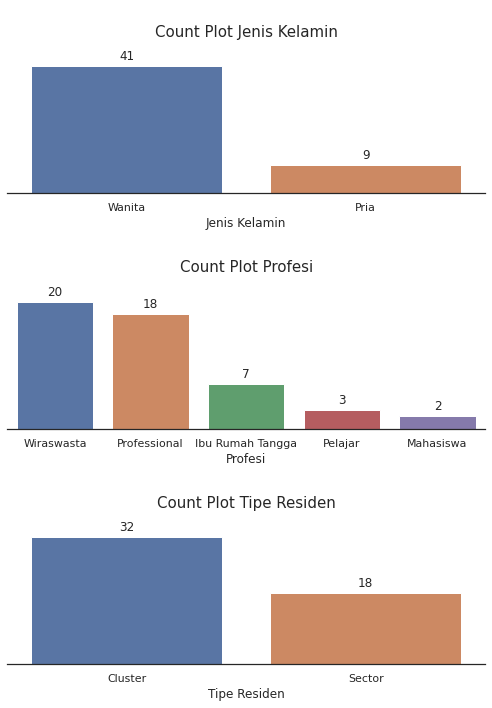

In [13]:
sns.set(style='white')
plt.clf()
  
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  

# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot
    sns.countplot(df[kol], order = df[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs)
    plt.tight_layout()

# Tampilkan plot
plt.show()

## Kesimpulan
Dari hasil explorasi data tersebut didapat informasi bahwa :  
- Rata-rata dari umur pelanggan adalah 37.5 tahun
- Rata-rata dari nilai belanja setahun pelanggan adalah 7,069,874.82
- Jenis kelamin pelanggan di dominasi oleh wanita sebanyak 41 orang (82%) dan laki-laki sebanyak 9 orang (18%)  
- Profesi terbanyak adalah Wiraswasta(40%) diikuti Profesional (36%) dan lainnya sebanyak 24%  
- Dari seluruh pelanggan 64% dari mereka tinggal di cluster dan 36% nya tinggal di sektor.

### Tips:
Dengan eksplorasi data kita dapat mengenal lebih jauh tentang data yang ada.
Proses eskplorasi data bisa berupa univariate maupun multivariate data eksplorasi. Eksplorasi Data Univariate melihat karakteristik tiap-tiap feature, misalnya dengan melihat statistik destriptif, membuat histogram, kdeplot, count plot maupun boxplot. Sedangkan untuk Eksplorasi Data Multivariate, untuk melihat hubungan tiap variabel dengan variabel lainnya, misalkan dengan membuat korelasi matrix, melihat predictive power, cross tabulasi dan lainnya.

## Mempersiapkan Data sebelum permodelan

Setiap machine learning model memiliki karakteriktik yang berbeda-beda. Oleh karena itu harus mempersiapkan data yang dimiliki sebelum melakukan permodelan, sehingga dapat menyesuaikan dengan karakteristik yang dimiliki oleh tiap model dan mendapatkan hasil yang optimal.

Disini teknik permodelan yang akan digunakan adalah unsupervised clustering. Algoritma yang digunakan adalah K-Prototypes. Langkah-langkahnya sebagai berikut :  
- Salah satu faktor utama dalam algoritma ini adalah perlu menggunakan data yang skala antar variable nya setara,  
- Selain itu juga perlu melakukan encoding kolom-kolom kategorikal yang dimiliki menjadi numerik,    
- kemudian menggabungkan hasil pemrosesan data tersebut menjadi satu data frame untuk digunakan dalam permodelan.


### 1.Lakukan standarisasi kolom-kolom numerik supaya berada pada satu skala sehingga variable yang memiliki skala besar tidak mendominsasi bagaimana cluster akan dibentuk dan juga tiap variabel akan dianggap sama pentingnya oleh algoritma

In [15]:
from sklearn.preprocessing import StandardScaler  
  
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
# Statistik sebelum Standardisasi  
print('Statistik Sebelum Standardisasi\n')  
print(df[kolom_numerik].describe().round(1))  
  
# Standardisasi  
df_std = StandardScaler().fit_transform(df[kolom_numerik])  
  
# Membuat DataFrame  
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)  
  
# Menampilkan contoh isi data dan summary statistic  
print('Contoh hasil standardisasi\n')  
print(df_std.head())  
  
print('Statistik hasil standardisasi\n')  
print(df_std.describe().round(0))  


Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean    0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


### 2. Konversi Kategorikal Data dengan label encoder
Selanjutnya ubah kolom-kolom yang berjenis kategorikal menjadi angka. Gunakan fungsi LabelEncoder dari sklearn. Fungsi ini akan melakukan konversi data pelanggan dari teks menjadi numerik, contoh pada kolom Jenis Kelamin, tesk 'Pria' akan diubah menjadi angka 0 dan text 'Wanita' akan diubah menjadi 1.
Perubahan ini perlu kita untuk semua teks semua sebelum digunakan pada algoritma K-Prototype.

In [17]:
from sklearn.preprocessing import StandardScaler
  
# Inisiasi nama kolom kategorikal  
kolom_numerik = ['Umur','Profesi','Tipe Residen']  
  
# Membuat salinan data frame  
df_encode = df[kolom_kategorikal].copy()  
  
  
# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
    df_encode[col]= LabelEncoder().fit_transform(df_encode[col])
      
# Menampilkan data  
print(df_encode.head())


   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


### 3. Menggabungkan Data untuk Permodelan
Tahap ini menggabungkan data frame dari kedua pemrosesan sebelumnya yaitu dt_std dan df_encode.

In [18]:
# Menggabungkan data frame
df_model= df_encode.merge(df_std, left_index = True, right_index=True, how= 'left') 
print(df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


## Kesimpulan
Sampai tahap ini sudah dilakukan beberapa langkah untuk pemrosesan data, sebagai berikut :  
1. Menyiapkan library data  
2. Melakukan proses eksplorasi data  
3. Menyiapkan data untuk digunakan permodelan  

Pada penerapan di industri, proses pemrosesan data ini termasuk yang paling banyak menghabiskan waktu bagi data scientist. Selain yang sudah dilakukan diatas masih banyak teknik lain yang perlu dilakukan, misalnya :  
- Melakukan data imputation ketika ada *Null* data di data set yang akan digunakan  
- Melakukan transformasi variabel, ketika ditemukan distribusi data yang condong ke salah satu sisi (skew data)  
- Menangani pencilan data